# Explore & Model

No specific plan for this notebook. Just want to explore and get a better feel for data overall. Practice some regression modeling so I can actually give some helpful advice to students

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse

In [2]:
df = pd.read_csv('../data/data1.csv').drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df.head()

,zcta,state,lat,long,average_household_income,mean_household_income_lowest_quintile,mean_household_income_second_quintile,mean_household_income_third_quintile,mean_household_income_fourth_quintile,mean_household_income_highest_quintile,...,earth_temp,frost_days,earth_temp_amplitude,solar_azimuth_angle,num_systems,total_capacity,mean_system_size,median_system_size,num_incentives,num_policies
0,85610,Arizona,31.744197,109.722324,53713.747228,15735.0,28976.0,41584.0,60403.0,121871.0,...,17.40,3.3,18.02,-100.64,13.0,70.150,5.396154,5.3800,17,12
1,85614,Arizona,31.814301,110.919400,67347.031441,15092.0,33942.0,52059.0,78902.0,156740.0,...,20.51,0.8,18.44,-101.18,1012.0,7015.507,6.932319,5.9850,17,12
2,85624,Arizona,31.504971,110.692999,56508.955224,12085.0,26596.0,40793.0,63481.0,139590.0,...,20.51,0.8,18.44,-101.18,24.0,150.860,6.285833,5.8650,17,12
3,85629,Arizona,31.917838,111.019035,91646.185302,24218.0,55100.0,82356.0,109225.0,187332.0,...,20.51,0.8,18.44,-101.18,1186.0,8934.678,7.533455,7.2975,17,12
4,85630,Arizona,31.886572,110.181046,57186.339381,6123.0,16639.0,37332.0,58660.0,167178.0,...,17.40,3.3,18.02,-100.64,37.0,258.010,6.973243,6.4800,17,12


`long` column should be negative

In [3]:
df['long'] = df['long'] * -1

Explore `total_capacity`

In [4]:
df['total_capacity'].isna().sum()

6345

All null values in PV columns should be 0

In [9]:
df.loc[:, ['num_systems', 'total_capacity', 'mean_system_size', 'median_system_size']] = df.loc[:, ['num_systems', 'total_capacity', 'mean_system_size', 'median_system_size']].fillna(0)

In [10]:
df.describe()

,zcta,lat,long,average_household_income,mean_household_income_lowest_quintile,mean_household_income_second_quintile,mean_household_income_third_quintile,mean_household_income_fourth_quintile,mean_household_income_highest_quintile,mean_household_income_top_5_percent,...,earth_temp,frost_days,earth_temp_amplitude,solar_azimuth_angle,num_systems,total_capacity,mean_system_size,median_system_size,num_incentives,num_policies
count,15740.000000,15740.000000,15740.000000,1.541700e+04,1.291300e+04,1.291300e+04,1.291300e+04,1.291300e+04,1.291300e+04,1.291300e+04,...,15740.000000,15740.000000,15740.000000,15740.000000,15740.000000,15740.000000,15740.000000,15740.000000,15740.000000,15740.000000
mean,49843.504511,38.723931,-91.208422,-inf,-1.603912e+07,-1.596299e+07,-1.593778e+07,-1.590414e+07,-1.580258e+07,-1.567021e+07,...,12.772213,7.253527,13.603645,-90.979829,103.379797,779.597284,5.689463,4.840616,26.896315,11.285769
std,33337.344009,5.136316,16.977850,NaN,1.022138e+08,1.020573e+08,1.020612e+08,1.020665e+08,1.020825e+08,1.021034e+08,...,5.255347,4.648079,3.212927,10.820162,392.944132,4451.072964,38.703188,24.748652,20.779303,7.712991
min,1001.000000,24.561353,-124.635404,-inf,-6.666667e+08,-6.666667e+08,-6.666667e+08,-6.666667e+08,-6.666667e+08,-6.666667e+08,...,0.570000,0.000000,0.840000,-116.730000,0.000000,0.000000,0.000000,0.000000,6.000000,3.000000
25%,15446.750000,34.465649,-102.402212,6.068030e+04,1.183800e+04,2.974400e+04,4.897500e+04,7.478300e+04,1.410940e+05,2.114520e+05,...,9.100000,2.280000,13.005000,-96.920000,0.000000,0.000000,0.000000,0.000000,11.000000,7.000000
50%,53082.000000,40.389070,-87.643148,7.449468e+04,1.586900e+04,3.812900e+04,6.091200e+04,9.034600e+04,1.744320e+05,2.814380e+05,...,11.190000,8.780000,14.190000,-88.960000,2.000000,12.975600,5.530000,5.100000,21.000000,8.000000
75%,79605.250000,42.059628,-76.280704,9.639473e+04,2.120700e+04,5.013600e+04,7.900000e+04,1.166150e+05,2.301940e+05,3.935250e+05,...,17.060000,10.920000,14.980000,-81.630000,23.000000,189.452477,8.190000,7.670625,34.000000,16.000000
max,99403.000000,48.991930,-69.937327,5.117132e+05,7.283600e+04,1.755610e+05,3.219390e+05,6.788080e+05,1.352190e+06,2.233721e+06,...,27.400000,18.240000,19.630000,-77.150000,6706.000000,434636.515000,2917.590000,2917.590000,85.000000,32.000000


In [12]:
df['total_capacity'].isna().sum()

0

In [13]:
df[['household_count', 'housing_unit_count', 'housing_unit_occupied_count', 'total_population']]

,household_count,housing_unit_count,housing_unit_occupied_count,total_population
0,451,691,451,1071
1,13104,16986,13104,23777
2,536,860,536,1289
3,8559,9260,8559,25770
4,937,1226,937,1757
...,...,...,...,...
15735,165,315,165,380
15736,778,1683,778,1555
15737,536,1539,536,1233
15738,195,386,195,394


Regression target is going to be `solar_density` which is the total capacity (kW) per 1,000 households in the ZCTA (`total_capacity` / (`household_count` / 1000)). Ensure `household_count` values are valid

In [15]:
df['household_count'].isna().sum()

0

In [16]:
df['household_count'].describe()

count    15740.000000
mean      4586.789263
std       5955.259954
min          0.000000
25%        363.750000
50%       1665.500000
75%       7258.250000
max      41355.000000
Name: household_count, dtype: float64

Check ZCTAs where `household_count` is 0

In [20]:
df.loc[df['household_count'] == 0]

,zcta,state,lat,long,average_household_income,mean_household_income_lowest_quintile,mean_household_income_second_quintile,mean_household_income_third_quintile,mean_household_income_fourth_quintile,mean_household_income_highest_quintile,...,earth_temp,frost_days,earth_temp_amplitude,solar_azimuth_angle,num_systems,total_capacity,mean_system_size,median_system_size,num_incentives,num_policies
14,85341,Arizona,31.879191,-112.798973,-inf,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0,...,23.49,0.17,18.25,-102.28,0.0,0.000,0.000,0.00,17,12
30,85707,Arizona,32.179209,-110.886905,-inf,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0,...,20.51,0.80,18.44,-101.18,7.0,16445.555,2349.365,4.95,17,12
31,85723,Arizona,32.180232,-110.965154,-inf,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0,...,20.51,0.80,18.44,-101.18,1.0,2917.590,2917.590,2917.59,17,12
32,85724,Arizona,32.240828,-110.945636,-inf,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0,...,20.51,0.80,18.44,-101.18,0.0,0.000,0.000,0.00,17,12
33,85726,Arizona,32.204728,-110.945598,-inf,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0,...,20.51,0.80,18.44,-101.18,0.0,0.000,0.000,0.00,17,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15456,54561,Wisconsin,46.097549,-89.513390,-inf,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0,...,4.32,14.49,14.30,-90.28,0.0,0.000,0.000,0.00,18,6
15538,54985,Wisconsin,44.075066,-88.518469,-inf,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0,...,7.34,12.57,14.48,-89.62,0.0,0.000,0.000,0.00,18,5
15563,54010,Wisconsin,44.734316,-92.465629,-inf,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0,...,5.81,13.40,15.26,-91.64,0.0,0.000,0.000,0.00,18,5
15564,54307,Wisconsin,44.470363,-88.036686,-inf,-666666666.0,-666666666.0,-666666666.0,-666666666.0,-666666666.0,...,7.71,12.04,12.76,-88.96,0.0,0.000,0.000,0.00,18,5


Looks like a lot of census data is missing for these ZCTAs. Explore `state` before dropping. Be sure these rows are spread across country (minimize bias)

In [26]:
df.loc[df['household_count'] == 0, 'state'].value_counts()

New York                50
California              46
Texas                   40
District of Columbia    30
Pennsylvania            24
Florida                 15
Washington              15
Arizona                 14
Ohio                    13
New Mexico              12
Wisconsin                9
New Jersey               8
Massachusetts            7
Oregon                   6
Connecticut              5
Delaware                 4
Illinois                 4
Vermont                  3
Utah                     2
Name: state, dtype: int64

I feel comfortable dropping for now. In future I will explore these more

In [27]:
df = df.loc[df['household_count'] > 0]

Calculate `solar_density`

In [29]:
df['solar_density'] = df['total_capacity'] / (df['household_count'] / 1000)
df['solar_density'].describe()

<ipython-input-29-b558883b97ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['solar_density'] = df['total_capacity'] / (df['household_count'] / 1000)


count     15433.000000
mean        167.977242
std        1277.650462
min           0.000000
25%           0.000000
50%           8.222376
75%         117.480874
max      116368.544846
Name: solar_density, dtype: float64

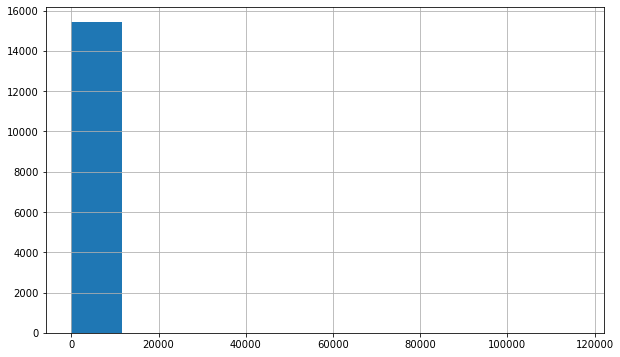

In [30]:
df['solar_density'].hist(figsize=(10,6));

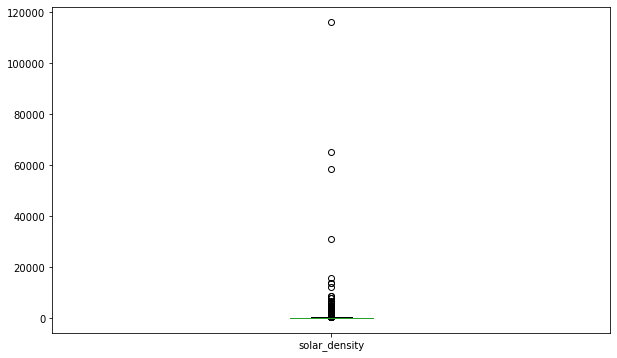

In [31]:
df['solar_density'].plot.box(figsize=(10,6));

Few extreme outliers. Look at any value above 10,000

In [35]:
df.loc[df['solar_density'] >= 10000, ['state', 'num_systems', 'total_capacity', 'household_count', 'solar_density']]

,state,num_systems,total_capacity,household_count,solar_density
143,Arizona,2.0,588.1200,9,65346.666667
1907,California,27.0,223.3041,16,13956.506250
4952,Massachusetts,65.0,466.8370,8,58354.625000
5827,New Jersey,19.0,208.1300,17,12242.941176
7029,New York,35.0,309.4500,10,30945.000000
13956,Utah,154.0,434636.5150,3735,116368.544846
14004,Utah,33.0,10317.9860,756,13648.129630
14035,Utah,14.0,5514.0350,353,15620.495751


In [41]:
df['solar_density'].quantile(.95)

749.49157122182

95% of ZCTAs have `solar_density` less than 750.

<AxesSubplot:>

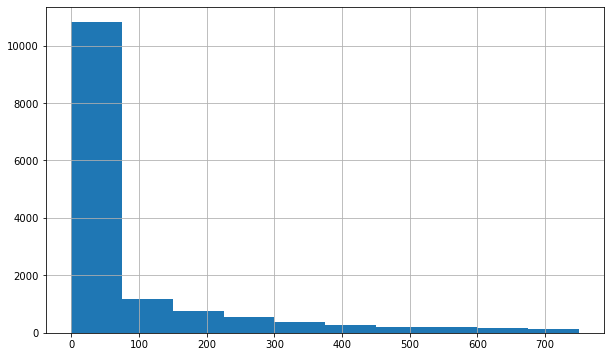

In [44]:
df.loc[df['solar_density'] < 750, 'solar_density'].hist(figsize=(10,6))

Over 6,000 ZCTAs have no solar. Separate and only look at those that do.

In [48]:
solar = df.loc[df['solar_density'] > 0]
solar.shape

(9350, 107)

In [49]:
solar['solar_density'].describe()

count      9350.000000
mean        277.261259
std        1632.242329
min           0.094475
25%          15.297666
50%          72.594995
75%         268.507274
max      116368.544846
Name: solar_density, dtype: float64

In [51]:
solar['solar_density'].quantile(.975)

1454.0948117595156

Look at everything below 1500

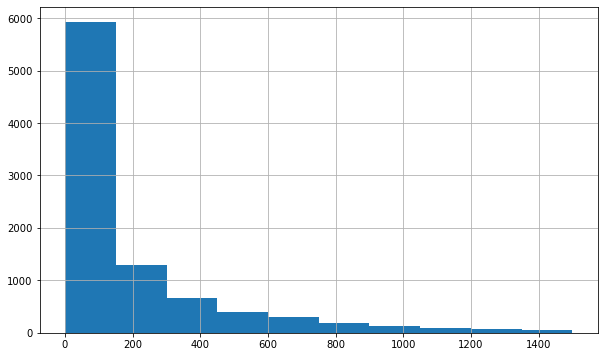

In [63]:
solar.loc[solar['solar_density'] < 1500, 'solar_density'].hist(figsize=(10,6));

## Modeling

Begin by exploring correlations with `solar_density` and visualizing relationship with strongest variables. Then using statsmodels for linear regression

In [66]:
solar.corr()['solar_density'].abs().sort_values(ascending=False)[5:25]

num_systems                              0.128078
housing_unit_median_value                0.121585
median_household_income                  0.121503
solar_radiation                          0.106286
heating_fuel_solar_rate                  0.104690
cloud_amount                             0.103406
relative_humidity                        0.100899
heating_fuel_solar                       0.098231
num_policies                             0.088994
num_incentives                           0.086913
frost_days                               0.081845
heating_degree_days                      0.078119
air_temp                                 0.071561
housing_unit_median_gross_rent           0.070183
earth_temp                               0.068124
long                                     0.066082
lat                                      0.065814
solar_azimuth_angle                      0.059683
mean_household_income_second_quintile    0.058984
education_bachelor_rate                  0.058393


Correlations without outliers

In [87]:
solar.loc[solar['solar_density'] < 1500].corr()['solar_density'].abs().sort_values(ascending=False)[:25]

solar_density                             1.000000
total_capacity                            0.624318
num_systems                               0.571302
heating_fuel_solar                        0.430581
cloud_amount                              0.411518
num_incentives                            0.399907
solar_radiation                           0.392422
num_policies                              0.375758
frost_days                                0.325148
relative_humidity                         0.321210
heating_degree_days                       0.318818
air_temp                                  0.281414
earth_temp                                0.271441
lat                                       0.260694
heating_fuel_solar_rate                   0.248471
long                                      0.206736
mean_household_income_second_quintile     0.183284
mean_household_income_third_quintile      0.182126
solar_azimuth_angle                       0.178432
education_high_school_graduate_

The outliers have a significant effect. 

In [76]:
len(solar.loc[solar['solar_density'] >= 1500])

221

221 values greater than or equal to 1500 (~2.5% of data). Remove these for modeling right now

In [74]:
outliers = solar.loc[solar['solar_density'] >= 1500]

In [77]:
solar = solar.loc[solar['solar_density'] < 1500]

In [78]:
solar.shape

(9129, 107)

Still have 9129 rows to work with

In [81]:
def plot_map(data, hue_var):

    fig, ax = plt.subplots(nrows=2, figsize=(10,12))
    sns.scatterplot(data=data, x='long', y='lat', hue='solar_density', ax=ax[0])
    ax[0].set_title('Solar Density by ZCTA')

    sns.scatterplot(data=data, x='long', y='lat', hue=hue_var, ax=ax[1])
    ax[1].set_title('ZCTAs by {}'.format(hue_var));

    plt.show()

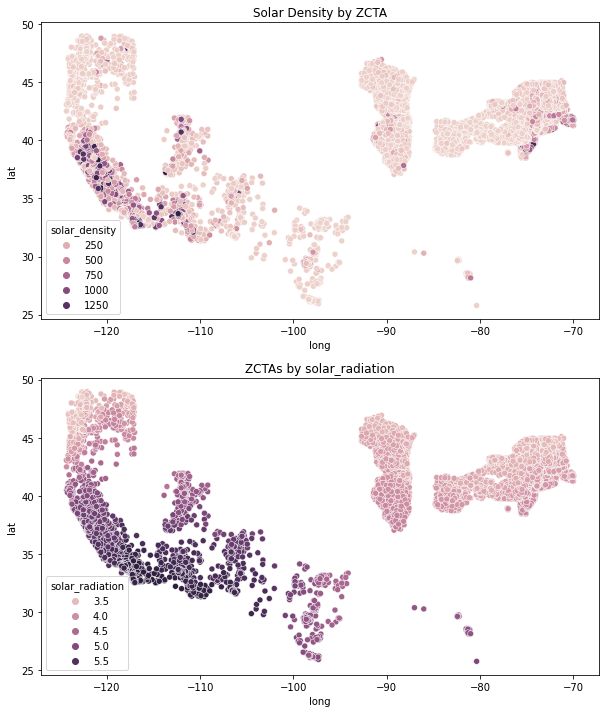

In [82]:
plot_map(data=solar, hue_var='solar_radiation')

### Baseline Model

Features:
- `solar_radiation`
- `num_incentives`
- `num_policies`
- `relative_humidity`
- `cloud_amount`

In [169]:
model1_feats = ['solar_radiation', 'relative_humidity', 'cloud_amount', 'num_incentives', 'num_policies', 'median_household_income']

In [170]:
X = solar[model1_feats]
y = solar['solar_density']

In [171]:
y.isna().sum()

0

In [172]:
X.isna().sum()

solar_radiation            0
relative_humidity          0
cloud_amount               0
num_incentives             0
num_policies               0
median_household_income    0
dtype: int64

In [179]:
model1 = sm.OLS(np.sqrt(X2['solar_density']), sm.add_constant(X2.drop(columns='solar_density'))).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          solar_density   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     514.6
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        13:48:14   Log-Likelihood:                -30624.
No. Observations:                8951   AIC:                         6.126e+04
Df Residuals:                    8944   BIC:                         6.131e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      27.3414      5.561      4.917      0.000      16.441      38.242
solar_radiation            -0.8090      0.758     -1.067      0.286      -2.295       0.677
relative_humidity          -0.1095      0.017     -6.518      0.000      -0.142      -0.077
cloud_amount               -0.1854      0.031     -5.924      0.000      -0.247      -0.124
num_incentives              0.1476      0.010     14.881      0.000       0.128       0.167
num_policies               -0.2650      0.034     -7.883      0.000      -0.331      -0.199
median_household_income  5.511e-05   2.72e-06     20.228      0.000    4.98e-05    6.04e-05
==============================================================================
Omnibus:                      832.631   Durbin-Watson:                   1.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1110.881
Skew:                           0.782   Prob(JB):                    5.96e-242
Kurtosis:                       3.731   Cond. No.                     5.66e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

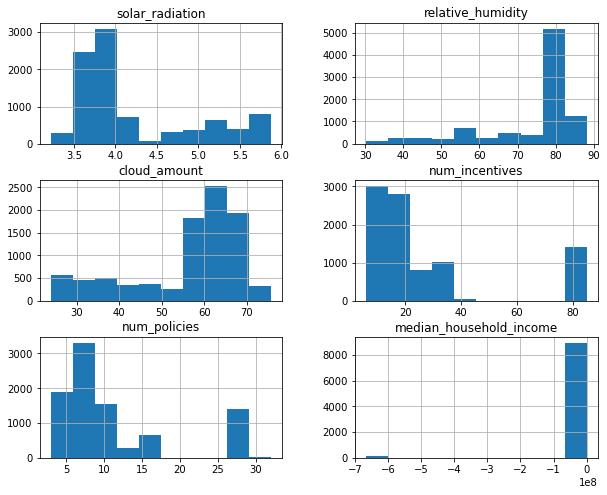

In [174]:
X.hist(figsize=(10,8));

<AxesSubplot:>

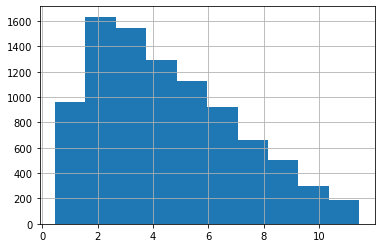

In [175]:
np.power(y, 1/3).hist()

In [176]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [177]:
X['solar_density'] = y

<ipython-input-177-21d70153a12d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['solar_density'] = y


In [178]:
X2 = X.loc[X['median_household_income']>=0]

In [180]:
inertias = []

for k in range(2, 10):

    mod = KMeans(n_clusters=k)
    mod.fit(X2)
    inertias.append(mod.inertia_)

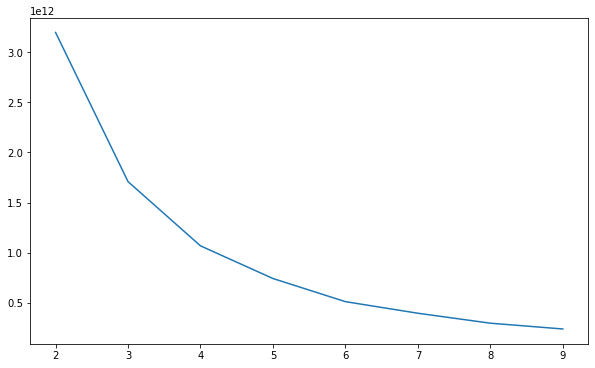

In [181]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(range(2,10), inertias)

In [182]:
mod = KMeans(n_clusters=3)

In [183]:
mod.fit(X2)

KMeans(n_clusters=3)

In [184]:
pd.DataFrame(mod.cluster_centers_, columns=X2.columns)

,solar_radiation,relative_humidity,cloud_amount,num_incentives,num_policies,median_household_income,solar_density
0,4.226629,72.607217,56.623394,27.184490,11.157416,53263.114291,146.776560
1,4.172021,75.507354,56.326163,28.684022,10.677514,88420.647250,236.738505
2,4.221853,77.075403,54.136252,32.435644,11.486563,147562.347949,264.423385
